In [1]:
import dmba
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

no display found. Using non-interactive Agg backend


In [2]:
%matplotlib inline

# CHAPTER 3 Data Visualization

In [3]:
df = dmba.load_data('ApplianceShipments.csv')

a. Create a well-formatted time plot of the data using Python.

In [4]:
df.head()

,Quarter,Shipments
0,Q1-1985,4009
1,Q2-1985,4321
2,Q3-1985,4224
3,Q4-1985,3944
4,Q1-1986,4123


In [5]:
def set_date(x):
    date = ''
    qt = x[0:2]
    year = x[3:7]
    
    if qt == 'Q1' :
        date = year+'-03-31'
    elif qt == 'Q2' :
        date = year+'-06-30'
    elif qt == 'Q3' :
        date = year+'-09-30'
    else :
        date = year+'-12-31'
    return date
#     print(date)

In [6]:
df['Quarter_date'] = df['Quarter'].apply(set_date)

In [7]:
df.head()

,Quarter,Shipments,Quarter_date
0,Q1-1985,4009,1985-03-31
1,Q2-1985,4321,1985-06-30
2,Q3-1985,4224,1985-09-30
3,Q4-1985,3944,1985-12-31
4,Q1-1986,4123,1986-03-31


In [8]:
df.set_index('Quarter_date', inplace=True)

In [9]:
# df.drop(columns='Quarter', inplace=True)

In [10]:
df.head()

,Quarter,Shipments
Quarter_date,,
1985-03-31,Q1-1985,4009
1985-06-30,Q2-1985,4321
1985-09-30,Q3-1985,4224
1985-12-31,Q4-1985,3944
1986-03-31,Q1-1986,4123


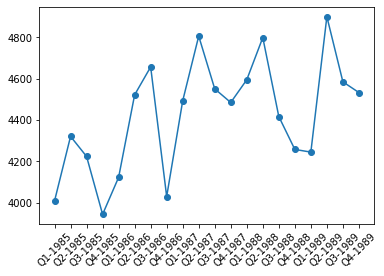

In [11]:
plt.plot(df.Quarter,df.Shipments,marker="o")
plt.xticks(rotation =45)
plt.show()
# 

b. Does there appear to be a quarterly pattern? For a closer view of the patterns, zoom in to the range of 3500–5000 on the y-axis.

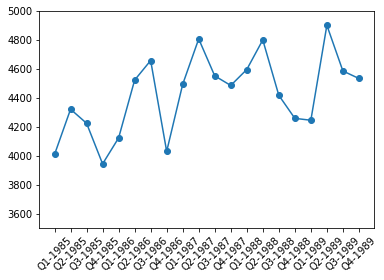

In [12]:
plt.plot(df.Quarter,df.Shipments,marker="o")
plt.ylim([3500, 5000]) 
plt.xticks(rotation =45)
plt.show()

c. Using Python, create one chart with four separate lines, one line for each of Q1, Q2, Q3, and Q4. In Python, this can be achieved by add column for quarter and year. Then group the data frame by quarter and then plot shipment versus year for each quarter as a separate series on a line graph. Zoom in to the range of 3500–5000 on the y-axis. Does there appear to be a difference between quarters?

In [13]:
# df['Quarter']
df['q'] = df['Quarter'].str.slice(0, 2)
df['year'] = df['Quarter'].str.slice(3, 8)

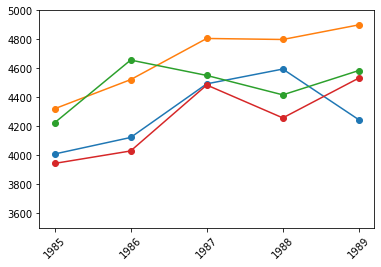

In [14]:
plt.plot(df[df['q']=='Q1'].year,df[df['q']=='Q1'].Shipments,marker="o")
plt.plot(df[df['q']=='Q2'].year,df[df['q']=='Q2'].Shipments,marker="o")
plt.plot(df[df['q']=='Q3'].year,df[df['q']=='Q3'].Shipments,marker="o")
plt.plot(df[df['q']=='Q4'].year,df[df['q']=='Q4'].Shipments,marker="o")
plt.ylim([3500, 5000]) 
plt.xticks(rotation =45)
plt.show()

d. Using Python, create a line graph of the series at a yearly aggregated level (i.e., the total shipments in each year).ㅡ

In [15]:
df_d = df.groupby('year').mean()[['Shipments']]

In [16]:
df_d.head()

,Shipments
year,
1985,4124.50
1986,4333.00
1987,4583.75
1988,4517.25
1989,4565.75


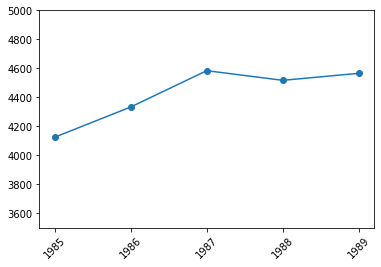

In [17]:
plt.plot(df_d.index, df_d.Shipments,marker="o")
plt.ylim([3500, 5000]) 
plt.xticks(rotation =45)
plt.show()

# CHAPTER 5 Evaluating Predictive Performance

In [18]:
## 굿노트로대체

# CHAPTER 7 k-Nearest Neighbors (k-NN)

In [19]:
df_5 = pd.DataFrame({'job':['Stat', 'Other'],
                             'year':[1, 1.1],
                             'course_yn':['0', '1']})
df_5

,job,year,course_yn
0,Stat,1.0,0
1,Other,1.1,1


In [20]:
# df_5['course_yn'] = df_5['course_yn'].astype('object')

In [21]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   job        2 non-null      object 
 1   year       2 non-null      float64
 2   course_yn  2 non-null      object 
dtypes: float64(1), object(2)
memory usage: 176.0+ bytes


In [22]:
# df.loc[len(df)] = ['IT', 1.0, '1']
df_5.loc[len(df_5), :] = ['IT', 1, np.nan]

In [23]:
df_5

,job,year,course_yn
0,Stat,1.0,0
1,Other,1.1,1
2,IT,1.0,NaN


In [24]:
df_5['year'] = df_5['year'].astype('str')

In [25]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        3 non-null      object
 1   year       3 non-null      object
 2   course_yn  2 non-null      object
dtypes: object(3)
memory usage: 204.0+ bytes


In [26]:
df_5_dummies = pd.get_dummies(df_5[['job', 'year']])
df_5_dummies_drop = pd.get_dummies(df_5[['job', 'year']], drop_first=True)

In [27]:
from scipy.spatial import distance
df5_d0 = df_5_dummies.iloc[0, :]
df5_d1 = df_5_dummies.iloc[1, :]
df5_d2 = df_5_dummies.iloc[2, :]

# print(distance.euclidean(a, b))

In [28]:
print(distance.euclidean(df5_d0, df5_d2))
print(distance.euclidean(df5_d1, df5_d2))

255.0019607767752
360.6272313622475


In [29]:
df5_d0_drop = df_5_dummies_drop.iloc[0, :]
df5_d1_drop = df_5_dummies_drop.iloc[1, :]
df5_d2_drop = df_5_dummies_drop.iloc[2, :]


In [30]:
print(distance.euclidean(df5_d0_drop, df5_d2_drop))
print(distance.euclidean(df5_d1_drop, df5_d2_drop))

1.0
1.4142135623730951


In [31]:
df_5_dummies_drop

,job_Other,job_Stat,year_1.1
0,0,1,0
1,1,0,1
2,0,0,0


둘다 같은 결과를 가져온다. 하지만 dorp_first를 수행하는 편이 유클리디언 거리의 차원을 줄이기 때문에 알아보기 쉬운 숫자가 나온다..?


# Chapter 08 - Naive Bayes classifier

In [40]:
df_08 = dmba.load_data('accidentsFull.csv')

In [41]:
df_08.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [44]:
df_08['INJURY'] = np.where(df_08['MAX_SEV_IR']==0, 'no', 'yes')

In [45]:
df_08['INJURY'] 

0        yes
1         no
2         no
3         no
4         no
        ... 
42178     no
42179    yes
42180     no
42181     no
42182     no
Name: INJURY, Length: 42183, dtype: object

In [53]:
df_08['INJURY'].value_counts(normalize=True)

yes    0.508783
no     0.491217
Name: INJURY, dtype: float64

아무 정보도 주어지지 않았을 때 부상당했을 확률이 높습니다.

In [57]:
df_08_b = df_08.loc[0:13, ['WEATHER_R','TRAF_CON_R','INJURY']]

In [59]:
df_08_b.groupby('INJURY').count()[['WEATHER_R', 'TRAF_CON_R']]

,WEATHER_R,TRAF_CON_R
INJURY,,
no,10,10
yes,4,4


In [69]:
predictors = ['WEATHER_R','TRAF_CON_R' ]
for predictor in predictors:
    df_p = df_08_b[['INJURY', predictor]]
    freqTable = df_p.pivot_table(index='INJURY', columns=predictor, aggfunc=len)
    
    # divide each value by the sum of the row to get conditional probabilities 
    propTable = freqTable.apply(lambda x: x / sum(x), axis=1)
    propTable = propTable.fillna(0)
    print(propTable)
    print()

WEATHER_R     1     2
INJURY               
no         0.40  0.60
yes        0.75  0.25

TRAF_CON_R    0    1    2
INJURY                   
no          0.7  0.2  0.1
yes         0.0  0.0  0.0



WEATHER_R 이 2이면 INJURY는 no  
WEATHER_R 이 1이면 INJURY는 yes  
TRAF_CON_R이 0이면 INJURY는 no  

In [77]:
if1 = df_08_b['WEATHER_R']==1
if2 = df_08_b['TRAF_CON_R']==1
if3 = df_08_b['INJURY']=='yes'

In [79]:
len(df_08_b[if1&if2&if3])/len(df_08_b[if1&if2])

0.0